In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'], index_col=['Dates'])

print('Null values: ' + str(df.isna().sum()))

df.head()

Null values: Prices    0
dtype: int64


,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


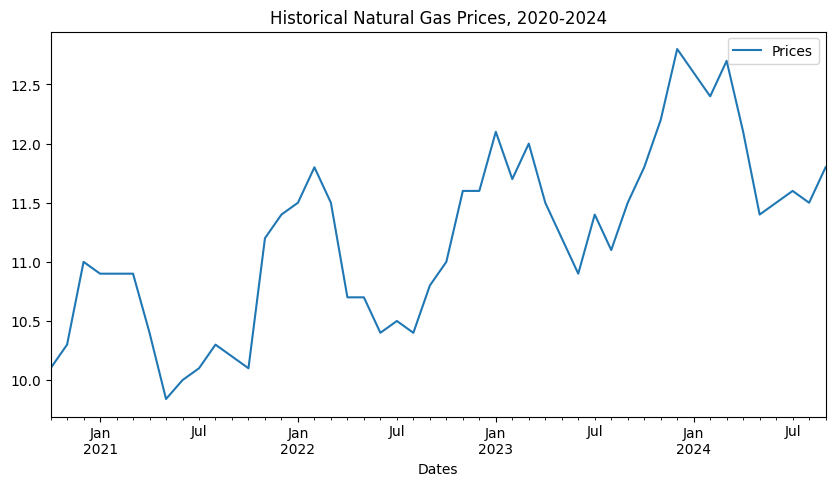

In [58]:
df.plot(title="Historical Natural Gas Prices, 2020-2024", figsize=(10,5))
plt.show()

In [59]:
df['Prices'].rolling(window=12).mean()

Dates
2020-10-31          NaN
2020-11-30          NaN
2020-12-31          NaN
2021-01-31          NaN
2021-02-28          NaN
2021-03-31          NaN
2021-04-30          NaN
2021-05-31          NaN
2021-06-30          NaN
2021-07-31          NaN
2021-08-31          NaN
2021-09-30    10.411667
2021-10-31    10.411667
2021-11-30    10.486667
2021-12-31    10.520000
2022-01-31    10.570000
2022-02-28    10.645000
2022-03-31    10.695000
2022-04-30    10.720000
2022-05-31    10.791667
2022-06-30    10.825000
2022-07-31    10.858333
2022-08-31    10.866667
2022-09-30    10.916667
2022-10-31    10.991667
2022-11-30    11.025000
2022-12-31    11.041667
2023-01-31    11.091667
2023-02-28    11.083333
2023-03-31    11.125000
2023-04-30    11.191667
2023-05-31    11.233333
2023-06-30    11.275000
2023-07-31    11.350000
2023-08-31    11.408333
2023-09-30    11.466667
2023-10-31    11.533333
2023-11-30    11.583333
2023-12-31    11.683333
2024-01-31    11.725000
2024-02-29    11.783333
2024-03-31

Perform time series decomposition to identify overall trend, seasonal attributes and any residual patterns. Period is set to 12 in order to reflect that this is monthly data, and the expected cycle is 12 months

In [60]:
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Original is just the graph of the original data, while the trend, seasonality and residuals each have their own plot

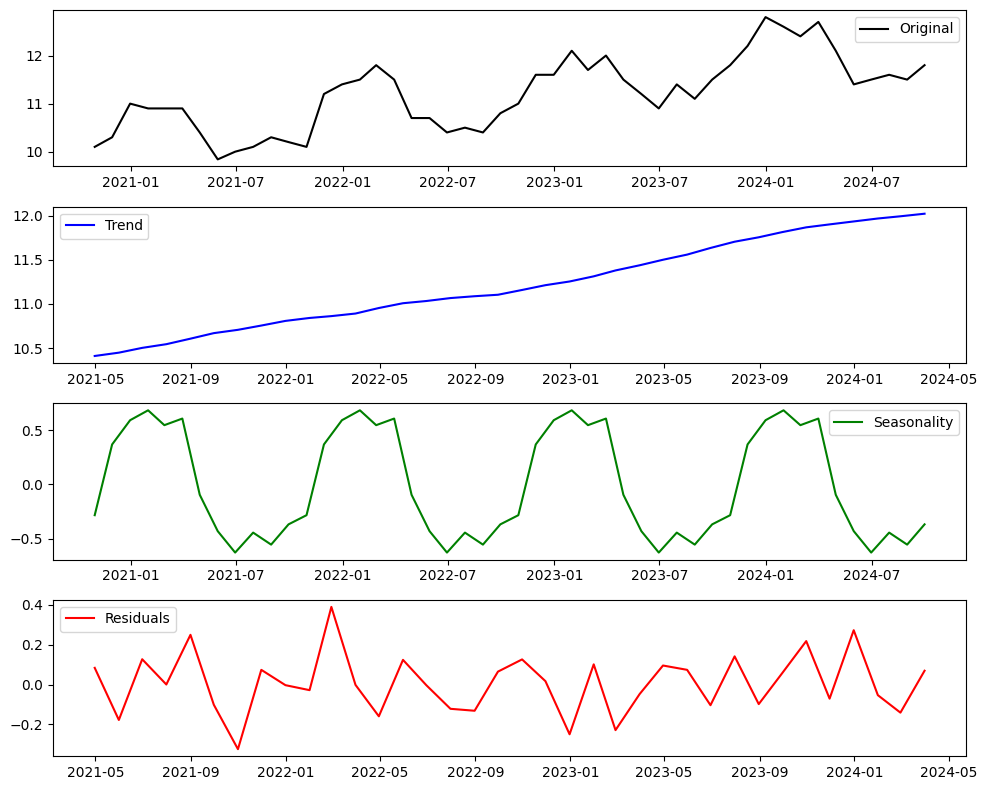

In [61]:
# Plot decomposition results
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['Prices'], label='Original', color='black')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend()

plt.tight_layout()
plt.show()


Create a model to forcast into the future

In [62]:
model = ARIMA(df['Prices'], order=(2,1,2)).fit()

model.forecast(steps=12)

c:\Users\gkarasek\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\gkarasek\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\gkarasek\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\gkarasek\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:

2024-10-31    12.090122
2024-11-30    12.352048
2024-12-31    12.518006
2025-01-31    12.547500
2025-02-28    12.437071
2025-03-31    12.220042
2025-04-30    11.956635
2025-05-31    11.717343
2025-06-30    11.564132
2025-07-31    11.534467
2025-08-31    11.632256
2025-09-30    11.827878
Freq: M, Name: predicted_mean, dtype: float64

In [63]:
df2 = model.forecast(steps=12).to_frame(name='Prices')

df2.head()

,Prices
2024-10-31,12.090122
2024-11-30,12.352048
2024-12-31,12.518006
2025-01-31,12.547500
2025-02-28,12.437071


In [64]:
final_df = pd.concat([df, df2])

final_df.head()

,Prices
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


In [65]:
final_df.shape

(60, 1)

In [66]:
final_decomposition = seasonal_decompose(final_df['Prices'], model='additive', period=12)

final_trend = final_decomposition.trend
final_seasonal = final_decomposition.seasonal
final_residual = final_decomposition.resid

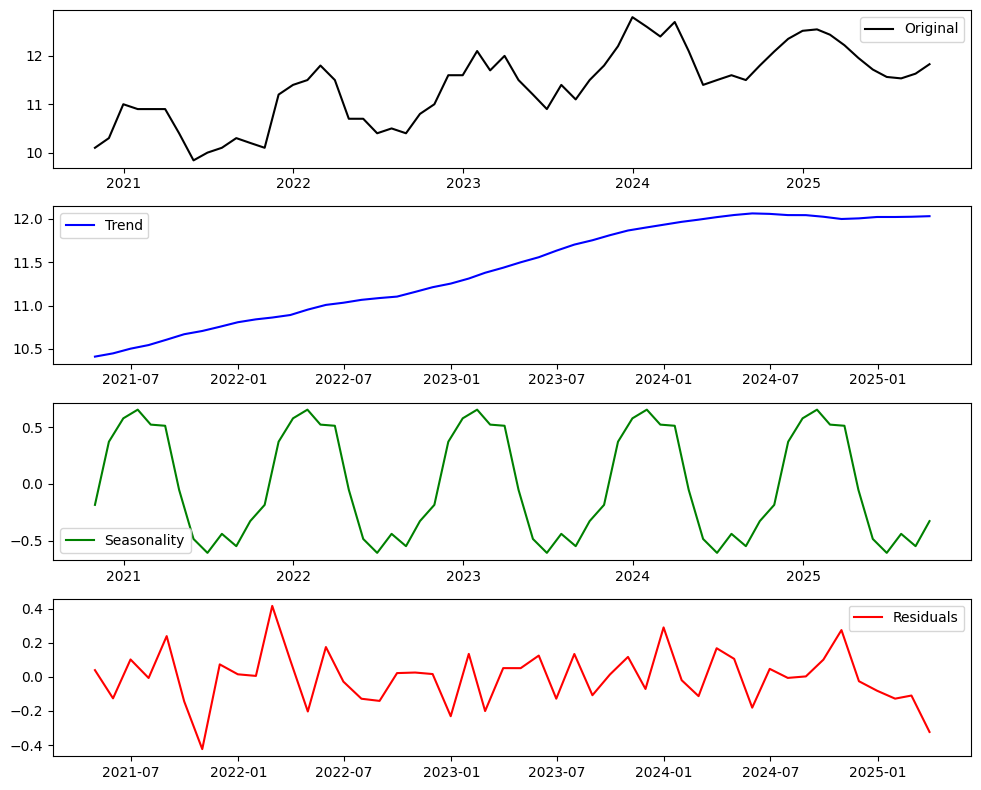

In [67]:
# Plot decomposition results
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(final_df['Prices'], label='Original', color='black')
plt.legend()

plt.subplot(412)
plt.plot(final_trend, label='Trend', color='blue')
plt.legend()

plt.subplot(413)
plt.plot(final_seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(414)
plt.plot(final_residual, label='Residuals', color='red')
plt.legend()

plt.tight_layout()
plt.show()

Due to the plateau seen on the trend graph with the predictive data, it is likely that ARIMA is not quite the right approach. Instead, using SARIMA will help the model account for seasonality, etc.

In [68]:
# Define SARIMA model
sarima_model = SARIMAX(df['Prices'],
                       order=(2, 1, 2),              # Regular ARIMA terms
                       seasonal_order=(1, 1, 1, 12), # Seasonal terms (yearly cycle)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit()

# Print summary statistics
print(sarima_result.summary())


c:\Users\gkarasek\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\gkarasek\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\gkarasek\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                               Prices   No. Observations:                   48
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                   1.881
Date:                              Tue, 18 Feb 2025   AIC                             10.238
Time:                                      10:56:05   BIC                             17.208
Sample:                                  10-31-2020   HQIC                            11.598
                                       - 09-30-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0612      0.446     -2.380      0.017      -1.935      -0.187
ar.L2         -0.46

The model has a relatively low AIC, which suggests a good balance of fit and complexity. If you want to improve the model, compare it with other SARIMA variations and pick the one with the lowest AIC.

In [69]:
# Forecast next 12 months
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Get confidence intervals
forecast_ci = forecast.conf_int()

# Create future date index
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Store results in a DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast.predicted_mean})
forecast_df.set_index('Date', inplace=True)


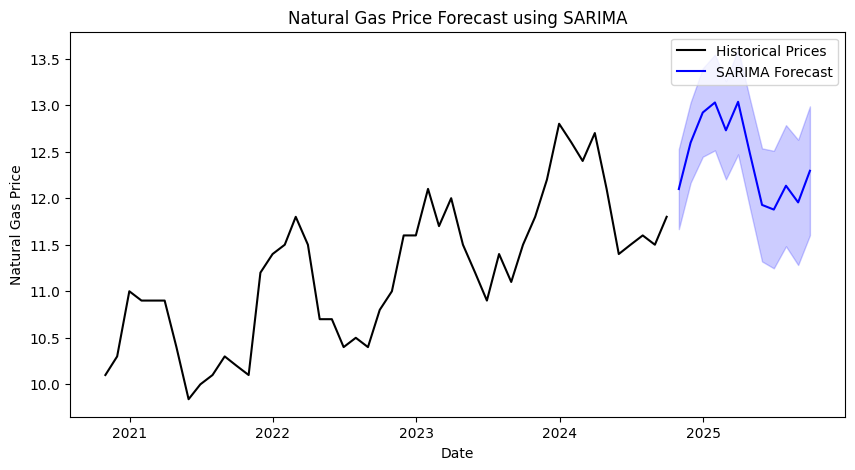

In [70]:
# Plot original data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Prices'], label="Historical Prices", color='black')

# Plot forecast
plt.plot(forecast_df.index, forecast_df['Forecast'], label="SARIMA Forecast", color='blue')

# Plot confidence intervals
plt.fill_between(forecast_df.index,
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='blue', alpha=0.2)

plt.xlabel("Date")
plt.ylabel("Natural Gas Price")
plt.title("Natural Gas Price Forecast using SARIMA")
plt.legend()
plt.show()


Since some parameters were found to not be significant, a simpler SARIMA model might have better results

In [71]:
# Define SARIMA model
sarima_model2 = SARIMAX(df['Prices'],
                       order=(1, 1, 1),              # Regular ARIMA terms
                       seasonal_order=(1, 1, 0, 12), # Seasonal terms (yearly cycle)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_result2 = sarima_model2.fit()

# Print summary statistics
print(sarima_result2.summary())


c:\Users\gkarasek\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\gkarasek\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                              Prices   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                   0.111
Date:                             Tue, 18 Feb 2025   AIC                              7.777
Time:                                     10:58:03   BIC                             12.141
Sample:                                 10-31-2020   HQIC                             8.805
                                      - 09-30-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4284      0.315     -1.358      0.174      -1.047       0.190
ma.L1         -0.5602      

In [72]:
# Forecast next 12 months
forecast_steps = 12
forecast2 = sarima_result2.get_forecast(steps=forecast_steps)

# Get confidence intervals
forecast_ci2 = forecast2.conf_int()

# Create future date index
future_dates2 = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Store results in a DataFrame
forecast_df2 = pd.DataFrame({'Date': future_dates, 'Forecast': forecast2.predicted_mean})
forecast_df2.set_index('Date', inplace=True)

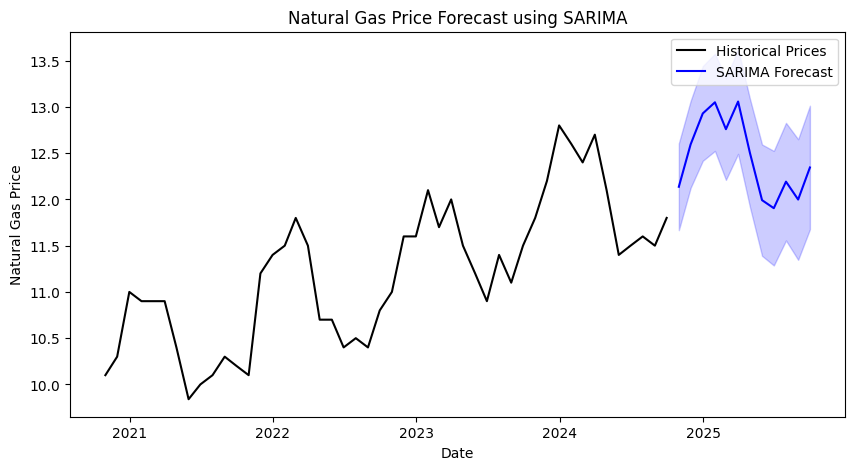

In [73]:
# Plot original data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Prices'], label="Historical Prices", color='black')

# Plot forecast
plt.plot(forecast_df2.index, forecast_df2['Forecast'], label="SARIMA Forecast", color='blue')

# Plot confidence intervals
plt.fill_between(forecast_df2.index,
                 forecast_ci2.iloc[:, 0], 
                 forecast_ci2.iloc[:, 1], 
                 color='blue', alpha=0.2)

plt.xlabel("Date")
plt.ylabel("Natural Gas Price")
plt.title("Natural Gas Price Forecast using SARIMA")
plt.legend()
plt.show()


In [76]:
forecast_df2.rename(columns={'Forecast': 'Prices'}, inplace=True)

final_df2 = pd.concat([df, forecast_df2])

final_df2.head()

,Prices
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


In [78]:
final_decomposition2 = seasonal_decompose(final_df2['Prices'], model='additive', period=12)

final_trend2 = final_decomposition2.trend
final_seasonal2 = final_decomposition2.seasonal
final_residual2 = final_decomposition2.resid

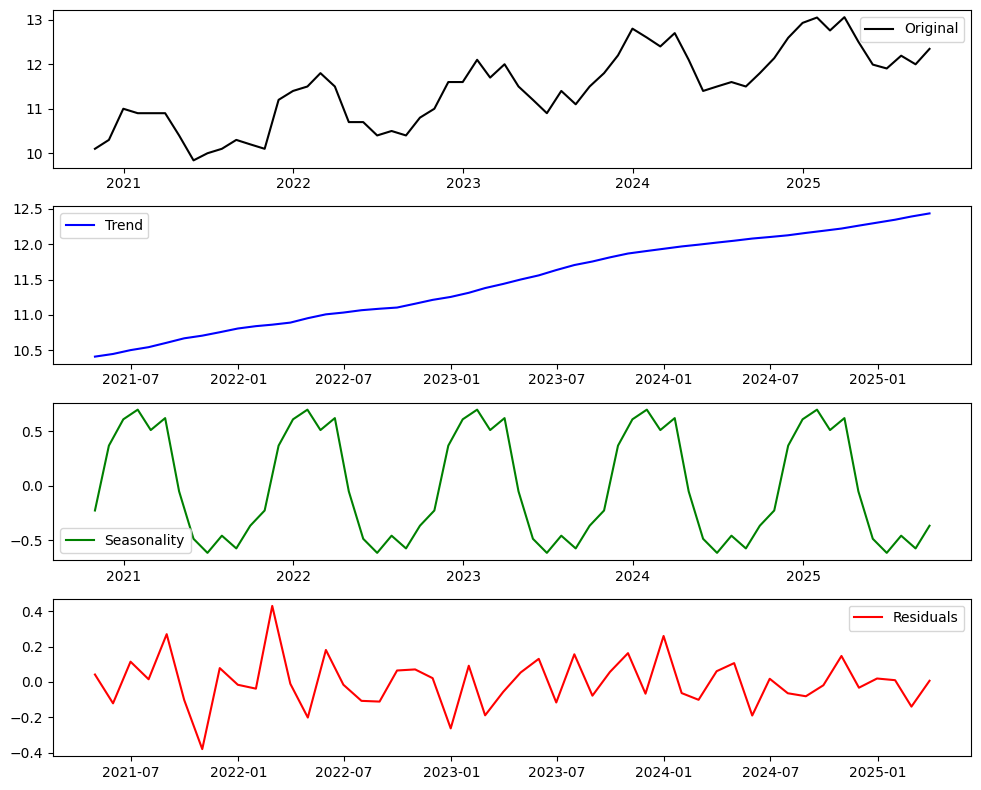

In [79]:
# Plot decomposition results
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(final_df2['Prices'], label='Original', color='black')
plt.legend()

plt.subplot(412)
plt.plot(final_trend2, label='Trend', color='blue')
plt.legend()

plt.subplot(413)
plt.plot(final_seasonal2, label='Seasonality', color='green')
plt.legend()

plt.subplot(414)
plt.plot(final_residual2, label='Residuals', color='red')
plt.legend()

plt.tight_layout()
plt.show()

In [80]:
final_df2.to_csv('final_sarima_projections.csv', index=True, header=True)